In [16]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread
from skimage.transform import resize
from scipy.ndimage.filters import convolve

(128, 128)


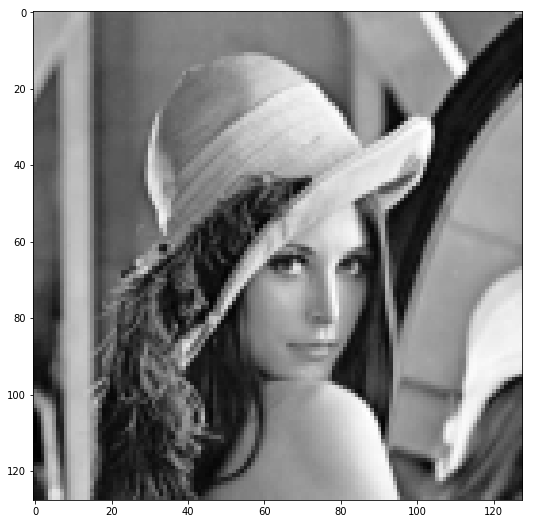

In [17]:
im = imread("../imageProcessing/samples/lena.jpg", pilmode="L")
im = resize(im, (128,128), mode="reflect", anti_aliasing=True)
im = (im * 255).astype(np.uint8)

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, cmap=plt.cm.gray)
plt.show()

# Exersice 2: Spatial Filtering (Convolution)

**Filtering** is a discrete convolution of an image $I$ with a filter mask $A \in \mathbb{R}^{m \times n}$:

$$
\begin{align}
 I_{A}       &= I * A \\
 I_{A}(i, j) &= \left(I * A\right)(i, j) \\
                                       &= \sum_{h=-\frac{m}{2}}^{\frac{m}{2}} \sum_{k=-\frac{n}{2}}^{\frac{n}{2}} A\left(h + \frac{m}{2} , k+\frac{n}{2}\right) \cdot I(i-h, j-k)
\end{align}
$$

Typically, the filter masks are square matrices, meaning $n=m$.
A special filter mask can be a **box filter**:

$$
\begin{align}
  B =%
  \dfrac{1}{9}\begin{pmatrix}
              1&1&1\\1&1&1\\1&1&1
             \end{pmatrix}.
\end{align}
$$

## Task 1 - Convolution Implementation

- Write a function, that applies an arbitrary (squared) filter to an image
- Is there any way to speed up your code?
- Test your code (possibly different implementations) and compare the runtimes
- Compare your implementation with the built-in method <code>scipy.ndimage.filters.convolve</code> (quality and runtime)

### Solution

In [18]:
def imfilter1(im, mask):
    h, w = im.shape
    m, n = mask.shape
    
    m_delta, n_delta = int((m-1) / 2), int((n-1) / 2)
    result = np.zeros(im.shape, dtype=np.float32)
    
    # Iterate over the image
    for y in range(h):
        for x in range(w):
            weighted_patch = np.zeros_like(mask)
            
            # Iterate over the filter mask
            for i in range(-m_delta, m_delta+1):
                for j in range(-n_delta, n_delta+1):
                    
                    # get "correct" coordinates in the weight mask
                    y_mask = i + m_delta
                    x_mask = j + n_delta

                    # compute for each position of the weight
                    # according coordinates in input image
                    y_src = min(max(y + j), h - 1)
                    x_src = min(max(x + i), w - 1)
                    
                    # get pixel value and the mask weight, 
                    # multiply them, store them in the 
                    # weighted patch and ...
                    pixel = im[y_src, x_src]
                    weight = mask[x_mask, y_mask]
                    weigted_patch[]= pixel*weight
                    
            # ... sum it up in the result image
            result[y,x] = sum
    return result.astype(im.dtype)

In [ ]:
def imfilter2(im, mask, mode="edge"):
    
    h, w = im.shape
    m, n = mask.shape
    
    m_delta, n_delta = int((m-1) / 2), int((n-1) / 2)
    result = np.zeros(im.shape, dtype=np.float32)
    
    # extend (pad) the image
    im_padded = np.pad(im, [(m_delta, m_delta), (n_delta, n_delta)], mode=mode)
    new_h, new_w = im_padded.shape
    
    for y in np.arange(h) + m_delta:
        for x in np.arange(w) + n_delta:
            """
                Here you need to do the following:
                - compute the extents, where the filter mask is currently located over the input image
                - get the image patch under this extent
                - compute it weighted sum with the mask
                - store the value in the correct position in the output
            """
            # FILL ME!
            pass
    return result.astype(im.dtype)

In [ ]:
I = im.copy()
size = 3
# TODO: construct the box filter with the given size
B = np.ones((size, size)) / size**2

# TODO: compute convolution with different methods 
# and display the runtimes
print("imfilter1")
# FILL ME!

print("imfilter2")
# FILL ME!

print("convolve")
# FILL ME!

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(16,9))

axs[0,0].imshow(I, cmap=plt.cm.gray)
axs[0,0].set_title("Original")

axs[0,1].imshow(I1, cmap=plt.cm.gray)
axs[0,1].set_title("imfilter1")

axs[1,0].imshow(I2, cmap=plt.cm.gray)
axs[1,0].set_title("imfilter2")

axs[1,1].imshow(I3, cmap=plt.cm.gray)
axs[1,1].set_title("convolve")

plt.show()

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(16,9))

axs[0,0].imshow(I, cmap=plt.cm.gray)
axs[0,0].set_title("Original")

axs[0,1].imshow(np.abs(I1-I2), vmin=0, vmax=255)
axs[0,1].set_title("Difference imfilter1 vs imfilter2")

axs[1,0].imshow(np.abs(I1-I3), vmin=0, vmax=255)
axs[1,0].set_title("Difference imfilter1 vs convolve")

axs[1,1].imshow(np.abs(I2-I3), vmin=0, vmax=255)
axs[1,1].set_title("Difference imfilter2 vs convolve")

plt.show()